# Introduction to Scikit-Learn

## Scikit-Learn workflow

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [91]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,4,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,1,2,0,2,1
4,57,0,0,120,354,0,1,163,1,1,2,0,2,1


In [92]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,4,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,1,2,0,2
4,57,0,0,120,354,0,1,163,1,1,2,0,2


In [93]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [94]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Note: you may need to restart the kernel to use updated packages.


In [95]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [96]:
X = car_sales.drop("Price", axis=1)
X["Make"].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [97]:
y = car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
#Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [100]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,0,0,1,0,1,0,35431
1,1,0,0,0,0,1,0,0,0,0,0,1,192714
2,0,1,0,0,0,0,0,0,1,0,1,0,84714
3,0,0,0,1,0,0,0,0,1,0,1,0,154365
4,0,0,1,0,0,1,0,0,0,1,0,0,181577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0,35820
996,0,0,1,0,0,0,0,0,1,1,0,0,155144
997,0,0,1,0,0,1,0,0,0,0,1,0,66604
998,0,1,0,0,0,0,0,0,1,0,1,0,215883


In [101]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [102]:
#Re-fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [103]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [104]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [105]:
#Fill the columns
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_3712\365453917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_3712\365453917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [106]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [107]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [108]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

In [109]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [110]:
car_sales_missing.dropna(subset="Price", inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [111]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [112]:
#Fill missing value whit sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [113]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [114]:
car_sales_filled["Make"].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan', 'missing'], dtype=object)

In [115]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [116]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8,41,7,1,322,3,38,-122
1,8,21,6,1,2401,2,38,-122
2,7,52,8,1,496,3,38,-122
3,6,52,6,1,558,3,38,-122
4,4,52,6,1,565,2,38,-122
...,...,...,...,...,...,...,...,...
20635,2,25,5,1,845,3,39,-121
20636,3,18,6,1,356,3,39,-121
20637,2,17,5,1,1007,2,39,-121
20638,2,18,5,1,741,2,39,-121


In [117]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [119]:
from sklearn.linear_model import Ridge

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440127

In [120]:
from sklearn.ensemble import RandomForestRegressor

for x in range(10, 110, 10):
    model = RandomForestRegressor(n_estimators=x)
    model.fit(X_train, y_train)
    print("n_estimator = ", x, " score: ")
    print(model.score(X_test, y_test))

n_estimator =  10  score: 
0.7857941687128691
n_estimator =  20  score: 
0.7957800605341049
n_estimator =  30  score: 
0.8024289666745015


KeyboardInterrupt: 

In [121]:
heart_disease = pd.read_csv("heart-disease.csv")

In [122]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,4,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,1,2,0,2,1
4,57,0,0,120,354,0,1,163,1,1,2,0,2,1


In [123]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7695473251028807

In [124]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,4,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,1,2,0,2
4,57,0,0,120,354,0,1,163,1,1,2,0,2


In [125]:
y_pred = model.predict(X_test)

In [126]:
np.mean(y_pred == y_test)

0.7695473251028807

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7695473251028807

In [128]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1], dtype=int64)

In [129]:
model.predict_proba(X_test[:5])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [130]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
260    0
199    0
14     1
47     1
94     1
Name: target, Length: 243, dtype: int64

In [131]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.80327869, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [132]:
model_single_score = model.score(X_test, y_test)

In [133]:
cross_validation_score = np.mean(cross_val_score(model, X, y))
model_single_score, cross_validation_score

(0.7695473251028807, 0.8183060109289617)

** Area under the reciever operating characteristic curve (AUC/ROC) **


In [134]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)

y_probs[:10]

array([[0.06, 0.94],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.76, 0.24],
       [0.01, 0.99],
       [0.1 , 0.9 ],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.06, 0.94],
       [0.48, 0.52]])

In [135]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.94, 0.14, 0.79, 0.24, 0.99, 0.9 , 0.43, 0.79, 0.94, 0.52])

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10714286, 0.14285714, 0.17857143,
       0.17857143, 0.21428571, 0.21428571, 0.25      , 0.25      ,
       0.39285714, 0.53571429, 0.60714286, 0.67857143, 0.78571429,
       0.82142857, 0.89285714, 1.        ])

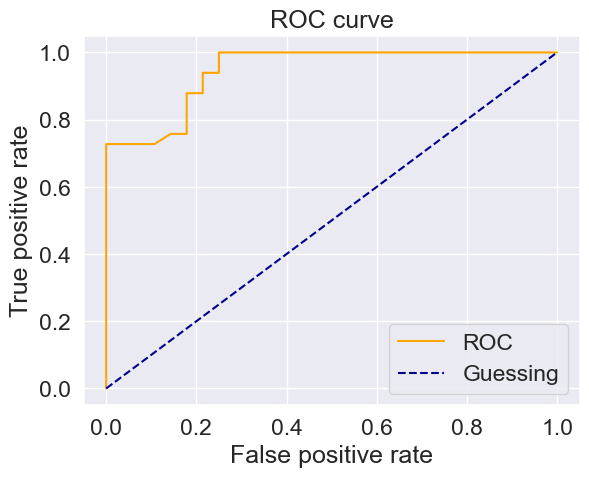

In [137]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr (False positive rate) and tpr (True positive rate) of a model
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9464285714285715

**Confusion Matrix**

In [139]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  5],
       [ 6, 27]], dtype=int64)

In [140]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual label"],
            colnames=["predicted labels"])

predicted labels,0,1
Actual label,,
0,23,5
1,6,27


In [141]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



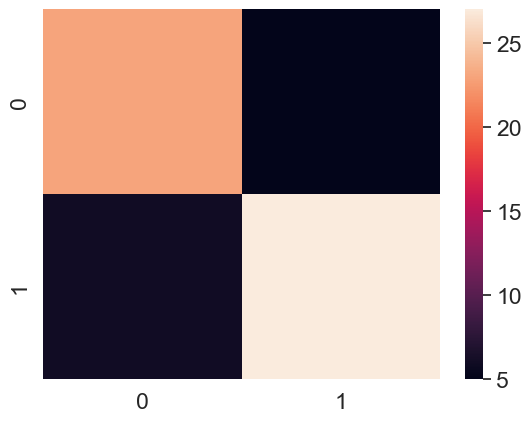

In [142]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

In [143]:
import sklearn
sklearn.__version__

'1.5.0'

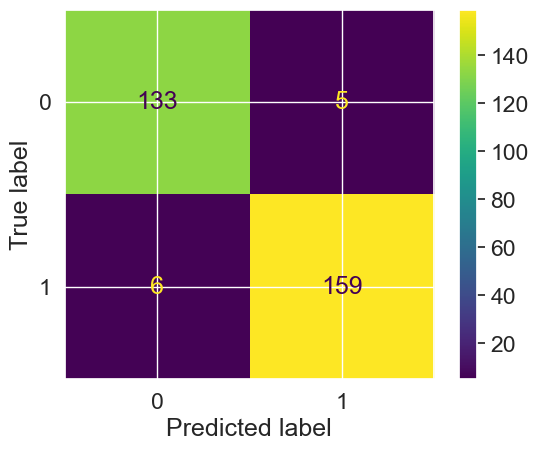

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

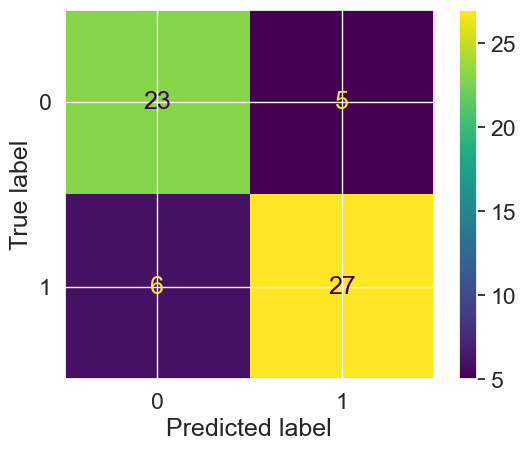

In [145]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred= y_preds)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.\\

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.\\

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.\\

Support - The number of samples each metric was calculated on.\\

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.\\

Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.\\

Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

### Evaluation a Regression model
- R^2 Coefficent of determination
- MAE Mean Absolute Error
- MSE Mean Square Error

In [147]:
from sklearn.ensemble import RandomForestRegressor

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7979829552559125

In [148]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.08135684, 2.08135684, 2.08135684, 2.08135684, 2.08135684,
       2.08135684, 2.08135684, 2.08135684, 2.08135684, 2.08135684])

In [149]:
r2_score(y_true=y_test,
         y_pred = y_test_mean)

0.0

In [150]:
r2_score(y_true=y_test,
         y_pred = y_test)

1.0

In [151]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3362089209060079

In [152]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]

df.head()

,actual values,predicted values,differences
6380,3,3,1
5256,5,5,-0
2204,1,2,1
18982,1,2,0
14147,1,1,-0


In [153]:
np.abs(df["differences"]).mean()

0.3362089209060079

In [170]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [158]:
df["squared_diffrences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_diffrences
6380,2.657000,3.279571,0.622571,0.387594
5256,5.000010,5.000010,-0.000000,0.000000
2204,0.889000,1.944710,1.055710,1.114524
18982,1.397000,1.599460,0.202460,0.040990
14147,1.351000,1.194450,-0.156550,0.024508


In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

model = RandomForestClassifier()

cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.83606557, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [162]:
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.15%


In [163]:
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision

array([0.81081081, 0.90625   , 0.84375   , 0.85294118, 0.76315789])

In [166]:
print(f"The cross validated precision is: {np.mean(cv_precision)}")

The cross validated precision is: 0.8353819764036483


In [165]:
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.87878788, 0.81818182, 0.87878788])

In [167]:
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8606060606060606


In [168]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to adjust:

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [177]:
def evaluate_pred(y_true, y_pred):
    """
    Performs evaluation comparison on y_true vs y_pred labels on a classification model.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_dic = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")

    return metric_dic

In [179]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled)) 
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

baseline_predict = evaluate_pred(y_valid, y_pred)
baseline_predict

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [203]:
np.random.seed(52)
model2 = RandomForestClassifier(n_estimators=100, max_depth=1)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_valid)

baseline_predict = evaluate_pred(y_valid, y_pred)

Accuracy: 84.44%
Precision: 0.80
Recall: 0.96
f1: 0.87


In [210]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 50, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_leaf": [1, 2, 4],
        "min_samples_split": [2, 4, 6] ,
        "max_features": ["auto", "sqrt"]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_jobs=1)

rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=100,
                              cv=5,
                              verbose=2)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2

c:\Users\filip\Desktop\DataScience-Tut\Matplot_course\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\filip\Desktop\DataScience-Tut\Matplot_course\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\filip\Desktop\DataScience-Tut\Matplot_course\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\filip\Desktop\DataScience-Tut\Matplot_course\env\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [211]:
rs_y_pred = rs_model.predict(X_test)
rs_metric = evaluate_pred(y_test, rs_y_pred)

Accuracy: 83.61%
Precision: 0.76
Recall: 0.93
f1: 0.84
